<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/82_C_DOE_DCL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

#  **Tema 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Ejemplo. Se desea evaluar el funcionamiento hepático en perros con diferentes patologías hepáticas que se encuentran con tratamiento de vitaminas B a 4 diferentes concentraciones. Por lo que se hace un doble arreglo en base a las patologías y razas, y se procedió a la medición de la Transaminasa Glutámico Pirúvica (TGP)**</span>

|Razas \ Patologias|	1:Isquemia	|2:Tumor	|3:Hepatitis	|4:Hemocromatosis|
|:--:|:--:|:--:|:--:|:--:|
|1:Cocker	|A=10|	B=9|	C=25|	D=8|*texto en cursiva*
|2:Pastor	|D=9|	A=5|	B=17|	C=26|
|3:Boxer	|C=24|	D=9	|A=8|	B=19|
|4:Schnauzer|	B=20|	C=22|	D=8|	A=5|

**¿Existen diferencias en la diferentes concentraciones de vitamina B con respecto a TGP?**


## **4.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Patologías  =  [ "Isquemia" ,  "Tumor" ,  "Hepatitis" ,  "Hemocromatosis" ]
Razas  =  [ "Cocker" ,  "Pastor" ,  "Boxer" ,  "Schnauzer" ]
VITAMINAS = ["A", "B", "C","D","D", "A", "B", "C","C", "D", "A", "B", "B", "C", "D", "A"]
TGP =[10, 9, 25, 8, 9, 5, 17, 26, 24, 9, 8, 19, 20, 22, 8 ,5]

## **4.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **4.2 Construyamos el dataFrame de los precios y productos**
DCL = pd.DataFrame({'Razas':np.repeat(["Cocker" ,  "Pastor" ,  "Boxer" ,  "Schnauzer"],4), 'Patologías':Patologías*4, 'VITAMINAS':VITAMINAS, 'TGP':TGP})


## **4.3 Veamos el DataFrame**

In [ ]:
## **4.3 Veamos el DataFrame**
DCL

,Razas,Patologías,VITAMINAS,TGP
0,Cocker,Isquemia,A,10
1,Cocker,Tumor,B,9
2,Cocker,Hepatitis,C,25
3,Cocker,Hemocromatosis,D,8
4,Pastor,Isquemia,D,9
5,Pastor,Tumor,A,5
6,Pastor,Hepatitis,B,17
7,Pastor,Hemocromatosis,C,26
8,Boxer,Isquemia,C,24
9,Boxer,Tumor,D,9


## **4.5. BoxPlot para DCL - TGP múltiple**

<Axes: title={'center': 'TGP vs VITAMINAS'}, xlabel='VITAMINAS', ylabel='TGP'>

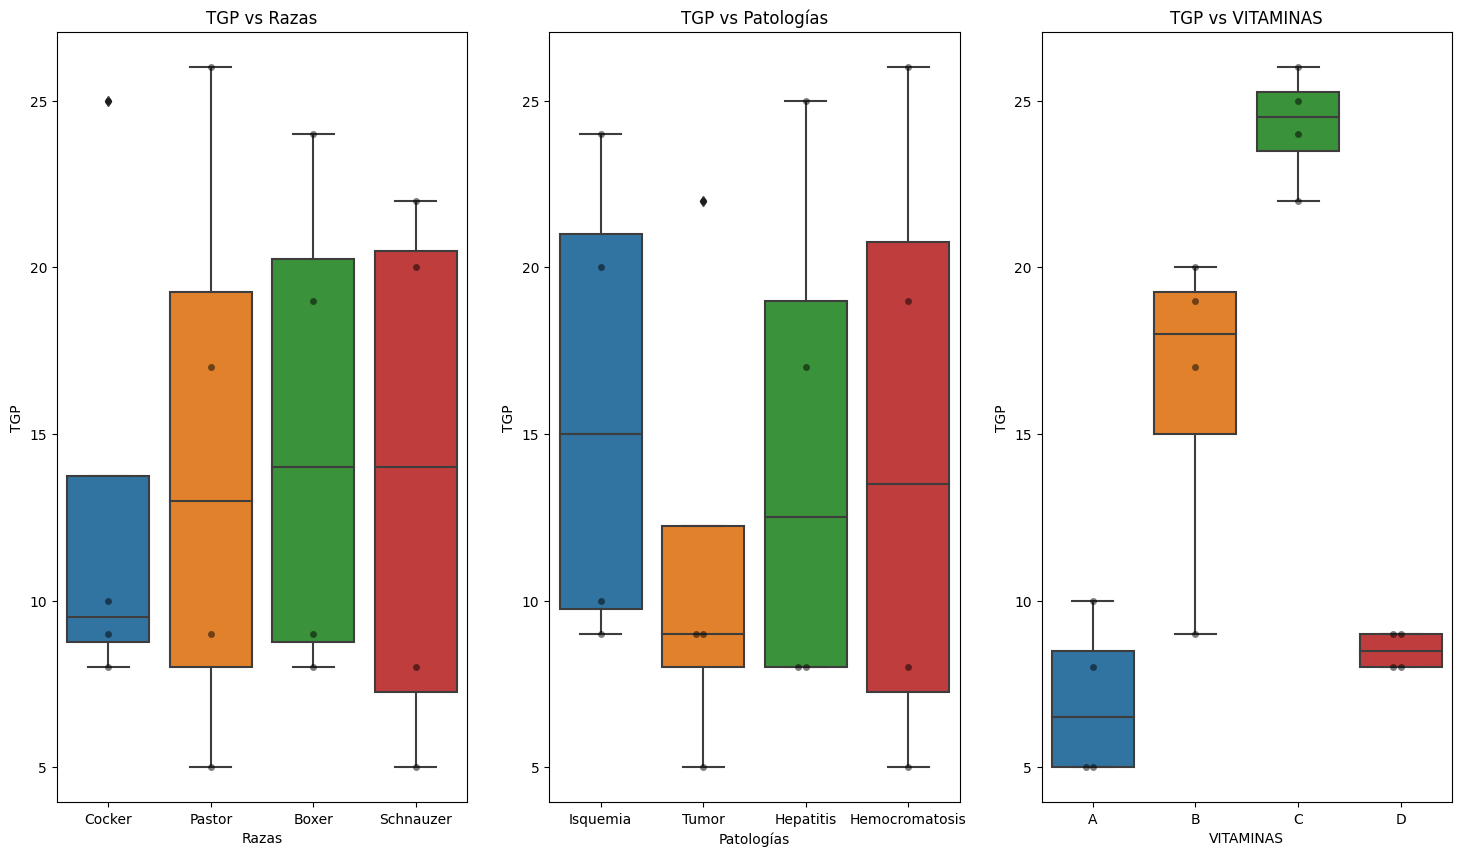

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))
axs[0].set_title('TGP vs Razas')
sns.boxplot(x="Razas", y="TGP", data=DCL, ax=axs[0])
sns.swarmplot(x="Razas", y="TGP", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('TGP vs Patologías')
sns.boxplot(x="Patologías", y="TGP", data=DCL, ax=axs[1])
sns.swarmplot(x="Patologías", y="TGP", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('TGP vs VITAMINAS')
sns.boxplot(x="VITAMINAS", y="TGP", data=DCL, ax=axs[2])
sns.swarmplot(x="VITAMINAS", y="TGP", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])


## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

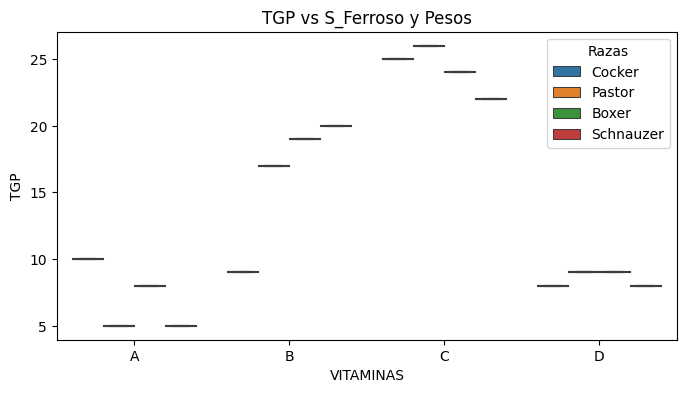

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('TGP vs S_Ferroso y Pesos')
sns.boxplot(x="VITAMINAS", y="TGP", hue='Razas', data=DCL, ax=ax);

## **4.7 Análisis de Varianza Tipo II**

In [ ]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCL = ols("TGP ~ VITAMINAS + Razas+Patologías", data = DCL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCL, typ=2)
print (anova_result2)

            sum_sq   df          F    PR(>F)
VITAMINAS    757.5  3.0  30.606061  0.000493
Razas          8.5  3.0   0.343434  0.795455
Patologías    44.5  3.0   1.797980  0.247633
Residual      49.5  6.0        NaN       NaN


In [ ]:
anova_result2.T

,VITAMINAS,Razas,Patologías,Residual
sum_sq,757.500000,8.500000,44.500000,49.5
df,3.000000,3.000000,3.000000,6.0
F,30.606061,0.343434,1.797980,NaN
PR(>F),0.000493,0.795455,0.247633,NaN


In [ ]:
print(modeloDCL.summary())

                            OLS Regression Results                            
Dep. Variable:                    TGP   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     10.92
Date:                Mon, 08 May 2023   Prob (F-statistic):            0.00438
Time:                        22:22:44   Log-Likelihood:                -31.738
No. Observations:                  16   AIC:                             83.48
Df Residuals:                       6   BIC:                             91.20
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# **4.7 Análisis de Varianza Tipo IiI**
modeloDCL = ols("TGP ~ VITAMINAS + Razas+Patologías", data = DCL).fit()
anova_result3 = sm.stats.anova_lm(modeloDCL, typ=3)
print (anova_result3)

            sum_sq   df          F    PR(>F)
Intercept    115.6  1.0  14.012121  0.009585
VITAMINAS    757.5  3.0  30.606061  0.000493
Razas          8.5  3.0   0.343434  0.795455
Patologías    44.5  3.0   1.797980  0.247633
Residual      49.5  6.0        NaN       NaN


## **4.9 Comparaciones Múltiples:DCL - TGP**
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,9.25,0.0036,3.1145,15.3855,True
A,C,17.25,0.0,11.1145,23.3855,True
A,D,1.5,0.8849,-4.6355,7.6355,False
B,C,8.0,0.0103,1.8645,14.1355,True
B,D,-7.75,0.0128,-13.8855,-1.6145,True
C,D,-15.75,0.0,-21.8855,-9.6145,True


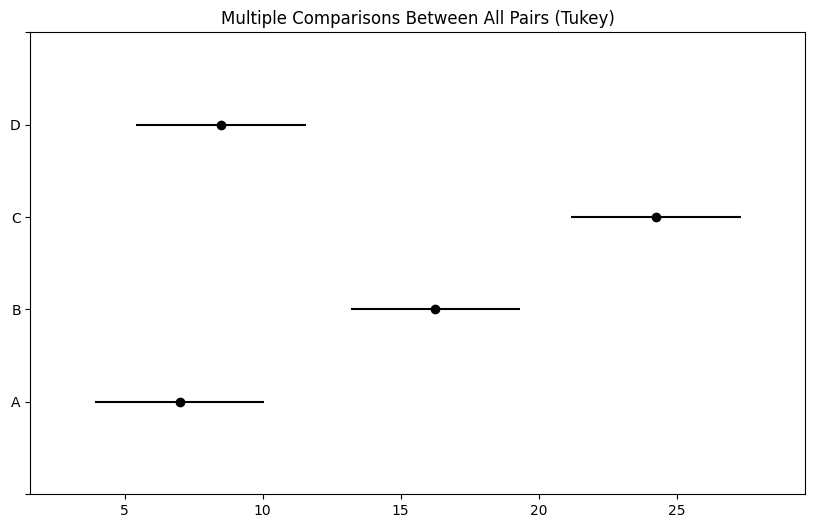

In [ ]:
### **a. Comparaciones Múltiples: TGP VS VITAMINAS**
tukey = pairwise_tukeyhsd(endog=DCL["TGP"],     # Data
                          groups=DCL["VITAMINAS"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: TGP VS Razas**

group1,group2,meandiff,p-adj,lower,upper,reject
Boxer,Cocker,-2.0,0.9863,-19.6841,15.6841,False
Boxer,Pastor,-0.75,0.9992,-18.4341,16.9341,False
Boxer,Schnauzer,-1.25,0.9965,-18.9341,16.4341,False
Cocker,Pastor,1.25,0.9965,-16.4341,18.9341,False
Cocker,Schnauzer,0.75,0.9992,-16.9341,18.4341,False
Pastor,Schnauzer,-0.5,0.9998,-18.1841,17.1841,False


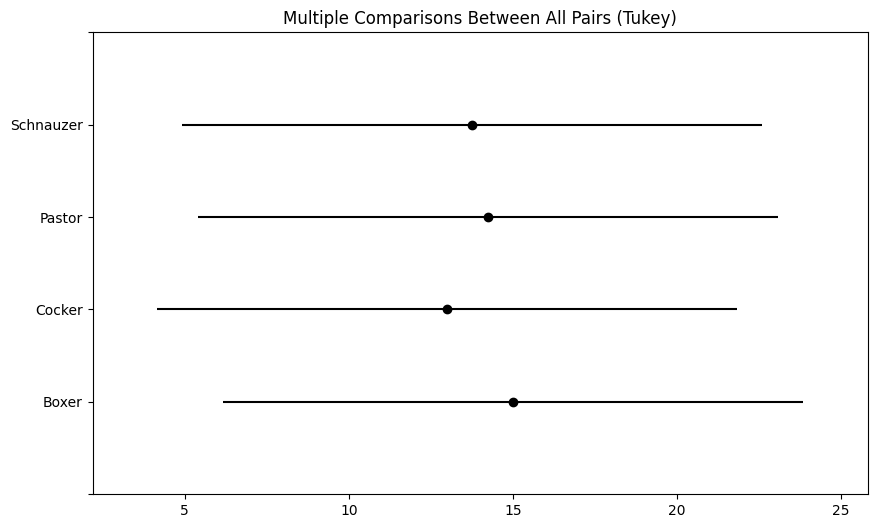

In [ ]:
### **b. Comparaciones Múltiples: TGP VS Razas**
tukey = pairwise_tukeyhsd(endog=DCL["TGP"],     # Data
                          groups=DCL["Razas"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: TGP VS Patologías**

group1,group2,meandiff,p-adj,lower,upper,reject
Hemocromatosis,Hepatitis,0.0,1.0,-17.3062,17.3062,False
Hemocromatosis,Isquemia,1.25,0.9963,-16.0562,18.5562,False
Hemocromatosis,Tumor,-3.25,0.9427,-20.5562,14.0562,False
Hepatitis,Isquemia,1.25,0.9963,-16.0562,18.5562,False
Hepatitis,Tumor,-3.25,0.9427,-20.5562,14.0562,False
Isquemia,Tumor,-4.5,0.8655,-21.8062,12.8062,False


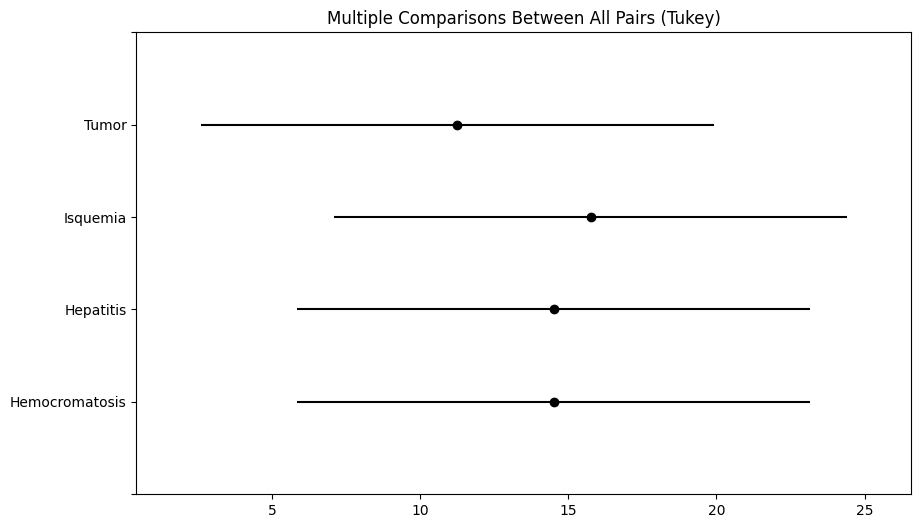

In [ ]:
### **c. Comparaciones Múltiples: TGP VS Patologías**
tukey = pairwise_tukeyhsd(endog=DCL["TGP"],     # Data
                          groups=DCL["Patologías"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **d. Comparaciones Múltiples Forma 2**

In [ ]:
# **d. Comparaciones Múltiples Forma 2**
pg.pairwise_ttests(
    dv      = 'TGP',
    within  = 'VITAMINAS',
    subject = 'Razas',
    padjust = 'holm',
    data    = DCL
)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-p

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,VITAMINAS,A,B,True,True,-2.627265,3.0,two-sided,0.078509,0.232507,holm,1.753,-2.045797
1,VITAMINAS,A,C,True,True,-13.118092,3.0,two-sided,0.000957,0.004784,holm,33.301,-7.104033
2,VITAMINAS,A,D,True,True,-1.133893,3.0,two-sided,0.339254,0.339254,holm,0.667,-0.732980
3,VITAMINAS,B,C,True,True,-2.642313,3.0,two-sided,0.077502,0.232507,holm,1.768,-1.864767
4,VITAMINAS,B,D,True,True,3.237844,3.0,two-sided,0.047929,0.191717,holm,2.451,1.896654
5,VITAMINAS,C,D,True,True,21.000000,3.0,two-sided,0.000236,0.001417,holm,84.102,10.743753


## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modeloDCL.resid)

ShapiroResult(statistic=0.933181881904602, pvalue=0.27366670966148376)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

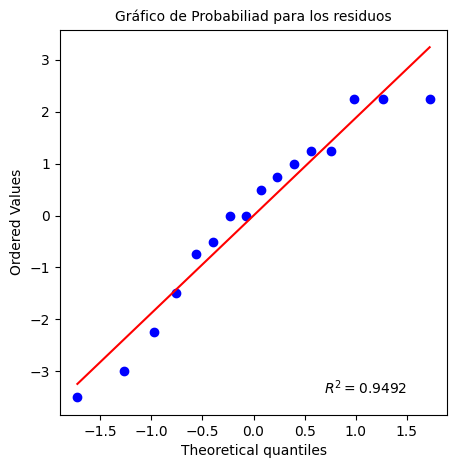

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**

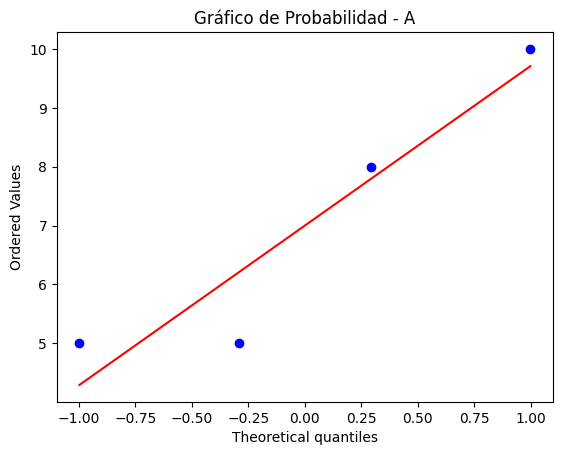

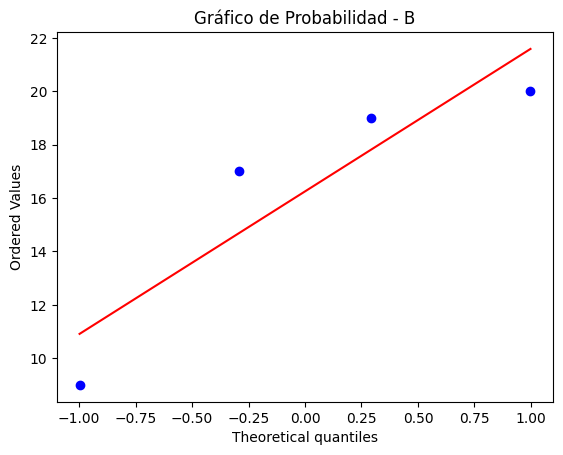

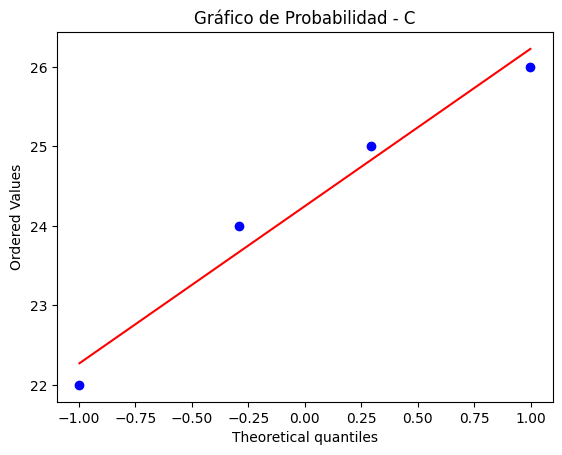

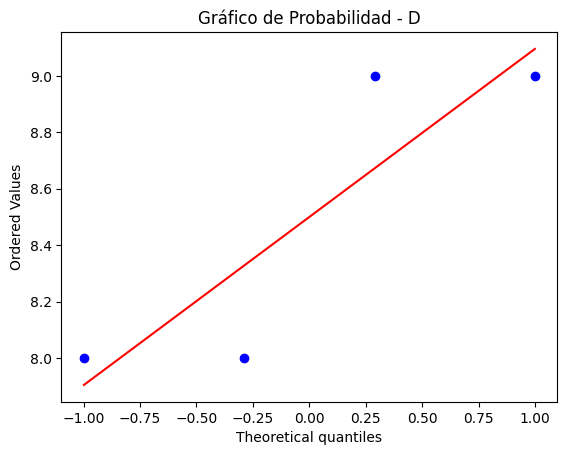

In [ ]:
# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**
unique_vitaminas = DCL['VITAMINAS'].unique()
for vitamina in unique_vitaminas:
    stats.probplot(DCL[DCL['VITAMINAS'] == vitamina]['TGP'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+vitamina)
    plt.show()

## **d. Histograma + curva normal teórica**

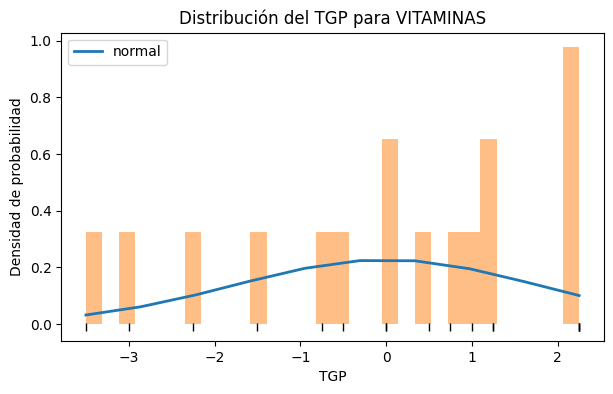

In [ ]:
## **d. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modeloDCL.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del TGP para VITAMINAS')
ax.set_xlabel('TGP')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCL['TGP'][DCL['VITAMINAS'] == 'A'],
             DCL['TGP'][DCL['VITAMINAS'] == 'B'],
             DCL['TGP'][DCL['VITAMINAS'] == 'C'],
             DCL['TGP'][DCL['VITAMINAS'] == 'D'])

LeveneResult(statistic=1.306930693069307, pvalue=0.3174098181460838)